<a href="https://colab.research.google.com/github/pinoke98/Artificial_Intelligence/blob/main/Proyecto_Model_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
import os

In [ ]:
from glob import glob # para recojer los datos mas facil

In [ ]:
def read_image(file_path, ROWS = 64,COLS = 64):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS))

def prep_data(images, ROWS = 64,COLS = 64,CHANNELS=3):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS))
  for i, image_file in enumerate(images):
    image = read_image(image_file,ROWS,COLS)
    data[i] = image   
  return data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/"

 7moSemestre		  Gatos_Perros.zip
 8voSemestre		  InformacionCOVID19.drawio
 Avion.jpg		 'Mastering Bitcoin by Andreas M. Antonopoulos.gdoc'
 Bus-U			  ModelosEntrega4
'Cadena de valor'	  mushrooms.csv
'Colab Notebooks'	 'Proyecto R'
 CuatroElementos.drawio   sample
 DataSet_Test.zip	  SimioBBQ_DF.drawio
 DataSet.zip		  SimioBBQ_DF.pdf
 FinalAnalisisYDiseño	  SistemasExpertos.drawio
 Final.drawio		  Team-4480-Code-2018-master
 FinalMyS.drawio


In [ ]:
#!unzip "/content/drive/MyDrive/DataSet.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: DataSet/Train/9320_idx5_x2201_y501_class0.png  
 extracting: DataSet/Train/9320_idx5_x2201_y851_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1051_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1101_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1151_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1201_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1251_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1301_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1351_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1401_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1451_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1501_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y151_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1551_class0.png  
 extracting: DataSet/Train/9320_idx5_x2251_y1601_class0.png  
 extracting:

In [ ]:
PATH="/content/DataSet"
os.listdir(f'{PATH}/Train')

['14211_idx5_x2451_y801_class1.png',
 '8917_idx5_x451_y851_class1.png',
 '8914_idx5_x2451_y2301_class0.png',
 '9261_idx5_x2201_y1751_class1.png',
 '9250_idx5_x1351_y1201_class1.png',
 '14191_idx5_x2151_y1651_class1.png',
 '9290_idx5_x351_y851_class0.png',
 '12626_idx5_x651_y2201_class1.png',
 '9265_idx5_x2301_y2101_class0.png',
 '10308_idx5_x1301_y2351_class1.png',
 '14190_idx5_x1851_y1251_class1.png',
 '12934_idx5_x2051_y601_class1.png',
 '9322_idx5_x2001_y1751_class0.png',
 '8917_idx5_x1451_y401_class1.png',
 '9259_idx5_x2151_y1551_class0.png',
 '9323_idx5_x851_y2151_class0.png',
 '8917_idx5_x1201_y1401_class0.png',
 '10301_idx5_x801_y751_class1.png',
 '9250_idx5_x601_y1951_class0.png',
 '14211_idx5_x1751_y801_class1.png',
 '9267_idx5_x2351_y1401_class1.png',
 '10303_idx5_x2351_y851_class1.png',
 '9259_idx5_x951_y2201_class1.png',
 '9266_idx5_x401_y1351_class0.png',
 '10308_idx5_x1901_y1851_class1.png',
 '12241_idx5_x1451_y1801_class1.png',
 '9257_idx5_x1251_y1201_class0.png',
 '1030

In [ ]:
imagePatchesNoCancer = glob('/content/DataSet/Train/*0.png', recursive=True)
imagePatchesConCancer = glob('/content/DataSet/Train/*1.png', recursive=True)
for filename in imagePatchesNoCancer[0:10]:
    print(filename)


/content/DataSet/Train/8914_idx5_x2451_y2301_class0.png
/content/DataSet/Train/9290_idx5_x351_y851_class0.png
/content/DataSet/Train/9265_idx5_x2301_y2101_class0.png
/content/DataSet/Train/9322_idx5_x2001_y1751_class0.png
/content/DataSet/Train/9259_idx5_x2151_y1551_class0.png
/content/DataSet/Train/9323_idx5_x851_y2151_class0.png
/content/DataSet/Train/8917_idx5_x1201_y1401_class0.png
/content/DataSet/Train/9250_idx5_x601_y1951_class0.png
/content/DataSet/Train/9266_idx5_x401_y1351_class0.png
/content/DataSet/Train/9257_idx5_x1251_y1201_class0.png


In [ ]:
imagePatches = glob('/content/DataSet/Train/*.png', recursive=True)
imagePatches

['/content/DataSet/Train/14211_idx5_x2451_y801_class1.png',
 '/content/DataSet/Train/8917_idx5_x451_y851_class1.png',
 '/content/DataSet/Train/8914_idx5_x2451_y2301_class0.png',
 '/content/DataSet/Train/9261_idx5_x2201_y1751_class1.png',
 '/content/DataSet/Train/9250_idx5_x1351_y1201_class1.png',
 '/content/DataSet/Train/14191_idx5_x2151_y1651_class1.png',
 '/content/DataSet/Train/9290_idx5_x351_y851_class0.png',
 '/content/DataSet/Train/12626_idx5_x651_y2201_class1.png',
 '/content/DataSet/Train/9265_idx5_x2301_y2101_class0.png',
 '/content/DataSet/Train/10308_idx5_x1301_y2351_class1.png',
 '/content/DataSet/Train/14190_idx5_x1851_y1251_class1.png',
 '/content/DataSet/Train/12934_idx5_x2051_y601_class1.png',
 '/content/DataSet/Train/9322_idx5_x2001_y1751_class0.png',
 '/content/DataSet/Train/8917_idx5_x1451_y401_class1.png',
 '/content/DataSet/Train/9259_idx5_x2151_y1551_class0.png',
 '/content/DataSet/Train/9323_idx5_x851_y2151_class0.png',
 '/content/DataSet/Train/8917_idx5_x1201_y1

In [ ]:
labels_train = np.array([(0 if '0.png' in fname else 1) for fname in imagePatches])
labels_train

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([24762, 24276]))

In [ ]:
ROWS = 50
COLS = 50
CHANNELS = 3
train = prep_data(imagePatches,ROWS=ROWS,COLS=COLS)

In [ ]:
train=train/255.0 #nomralizar

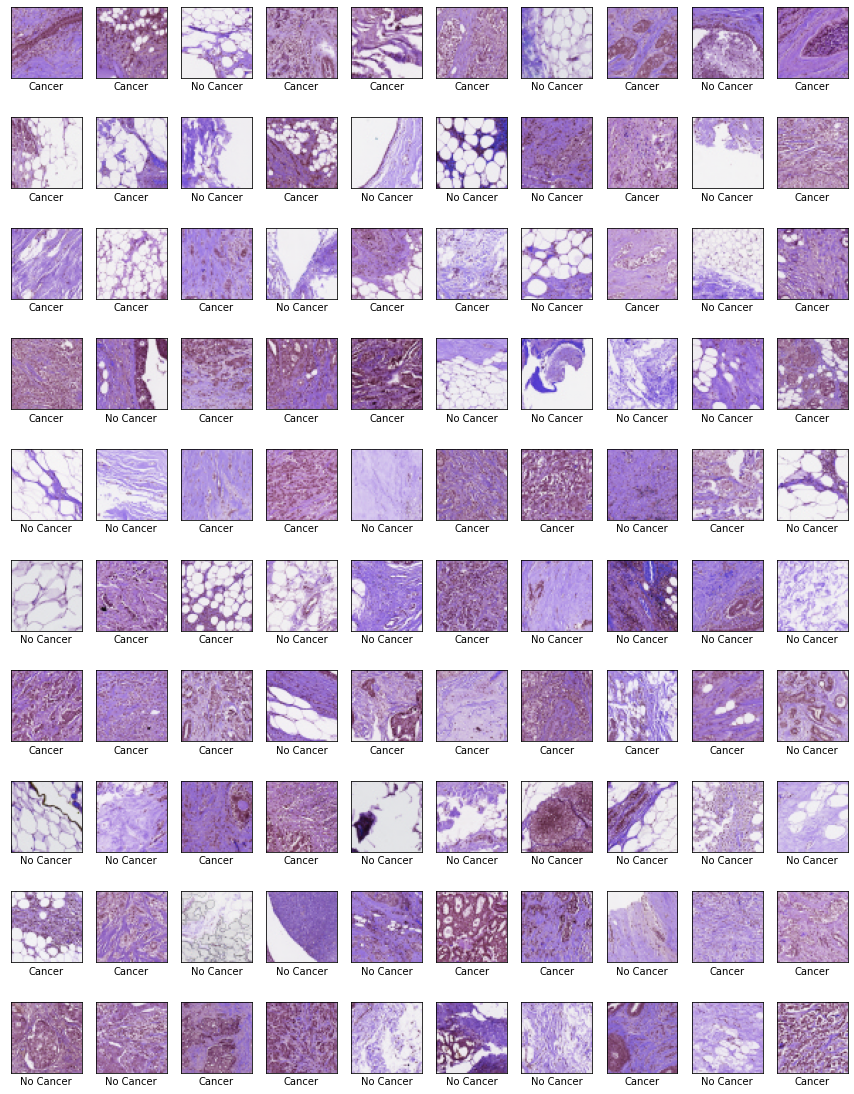

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i])
    plt.xlabel('No Cancer' if labels_train[i]==0 else 'Cancer')
plt.show()

In [ ]:
#!unzip "/content/drive/MyDrive/DataSet_Test.zip"

Archive:  /content/drive/MyDrive/DataSet_Test.zip
   creating: DataSet_Test/Test/
 extracting: DataSet_Test/Test/16568_idx5_x1001_y1001_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y1051_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y1101_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y1151_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y251_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y801_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y851_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y901_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1001_y951_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x101_y851_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x101_y901_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x101_y951_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1051_y1001_class0.png  
 extracting: DataSet_Test/Test/16568_idx5_x1051_y1051_clas

In [ ]:
PATH="/content/DataSet_Test"
os.listdir(f'{PATH}/Test')

['16570_idx5_x2801_y251_class1.png',
 '16896_idx5_x1751_y401_class0.png',
 '16896_idx5_x651_y1701_class0.png',
 '16570_idx5_x2701_y1251_class0.png',
 '16568_idx5_x1951_y1501_class0.png',
 '16568_idx5_x2301_y601_class1.png',
 '16569_idx5_x501_y51_class0.png',
 '16568_idx5_x1101_y751_class0.png',
 '16896_idx5_x2101_y51_class0.png',
 '16568_idx5_x1801_y951_class1.png',
 '16570_idx5_x2451_y951_class1.png',
 '16896_idx5_x601_y951_class0.png',
 '16896_idx5_x1251_y1201_class0.png',
 '16568_idx5_x1651_y101_class0.png',
 '16568_idx5_x1201_y1251_class0.png',
 '16896_idx5_x1151_y1901_class0.png',
 '16568_idx5_x2051_y751_class1.png',
 '16568_idx5_x1751_y1001_class1.png',
 '16896_idx5_x301_y351_class0.png',
 '16570_idx5_x2601_y1201_class1.png',
 '16570_idx5_x2701_y501_class1.png',
 '16895_idx5_x1551_y1101_class1.png',
 '16569_idx5_x501_y1301_class1.png',
 '16568_idx5_x1701_y551_class1.png',
 '16896_idx5_x1501_y51_class0.png',
 '16896_idx5_x1201_y651_class0.png',
 '16570_idx5_x1851_y1051_class0.png'

In [ ]:
imagePatches_Test = glob('/content/DataSet_Test/Test/*.png', recursive=True)
imagePatches_Test

['/content/DataSet_Test/Test/16570_idx5_x2801_y251_class1.png',
 '/content/DataSet_Test/Test/16896_idx5_x1751_y401_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x651_y1701_class0.png',
 '/content/DataSet_Test/Test/16570_idx5_x2701_y1251_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x1951_y1501_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x2301_y601_class1.png',
 '/content/DataSet_Test/Test/16569_idx5_x501_y51_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x1101_y751_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x2101_y51_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x1801_y951_class1.png',
 '/content/DataSet_Test/Test/16570_idx5_x2451_y951_class1.png',
 '/content/DataSet_Test/Test/16896_idx5_x601_y951_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_x1251_y1201_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x1651_y101_class0.png',
 '/content/DataSet_Test/Test/16568_idx5_x1201_y1251_class0.png',
 '/content/DataSet_Test/Test/16896_idx5_

In [ ]:
Y_test = np.array([(0 if '0.png' in fname else 1) for fname in imagePatches_Test])
Y_test

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
np.unique(Y_test,return_counts=True)

(array([0, 1]), array([2354, 1006]))

In [ ]:
ROWS = 50
COLS = 50
CHANNELS = 3
X_test = prep_data(imagePatches_Test,ROWS=ROWS,COLS=COLS)

In [ ]:
X_test=X_test/255.0 #nomralizar

In [ ]:
len(Y_test)

3360

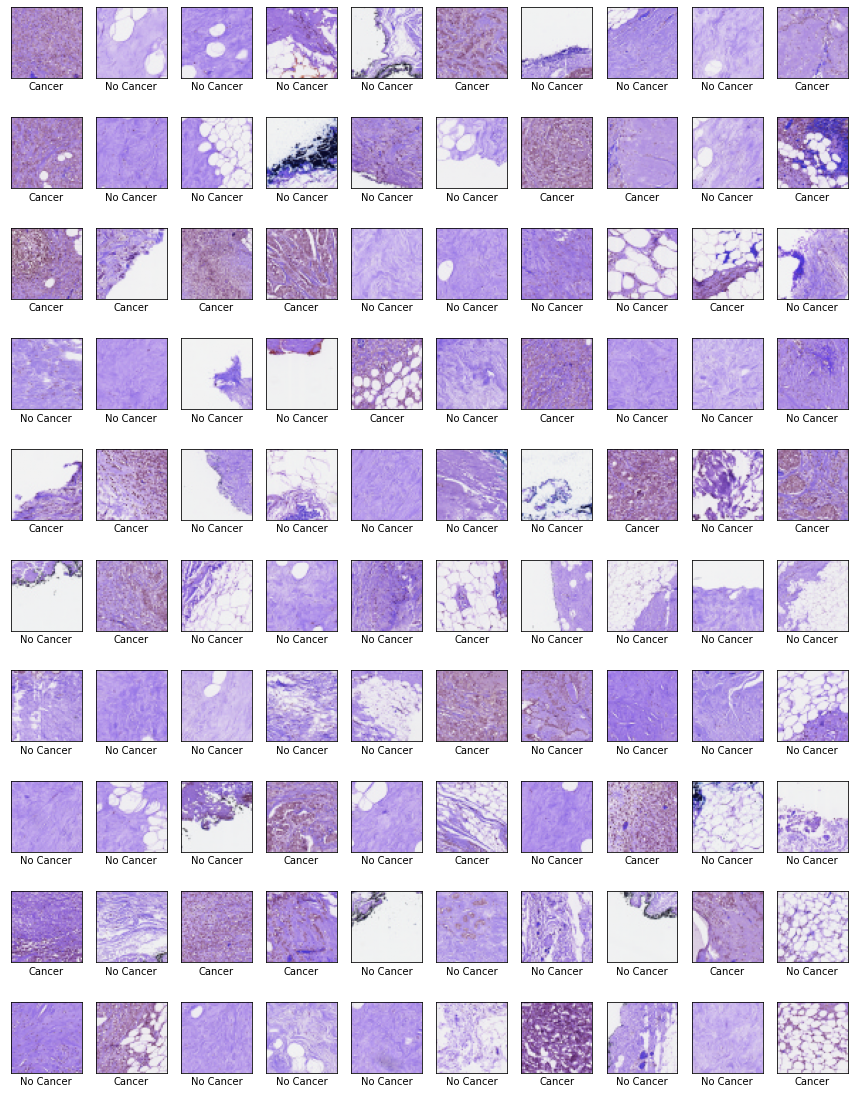

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel('No Cancer' if Y_test[i]==0 else 'Cancer')
plt.show()

##Modelo Melo 1

In [ ]:
train_input = keras.Input(shape=(50,50,3), name='Train')
x1 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(train_input)
x2 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x1)
x3 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x2)
x4 = layers.MaxPool2D(pool_size=(2,2))(x3)

x5 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x4)
x6 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x5)
x7 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x6)
x8 = layers.MaxPool2D(pool_size=(2,2))(x7)

x9 = layers.Flatten()(x8)
x10 = layers.Dense(128, activation='relu')(x9)
x11 = layers.Dropout(0.2)(x10)
pred = layers.Dense(1, activation='sigmoid', name='Sepsis_pred')(x11)
model = keras.Model(inputs=train_input,outputs=pred)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Train (InputLayer)           [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        36928 

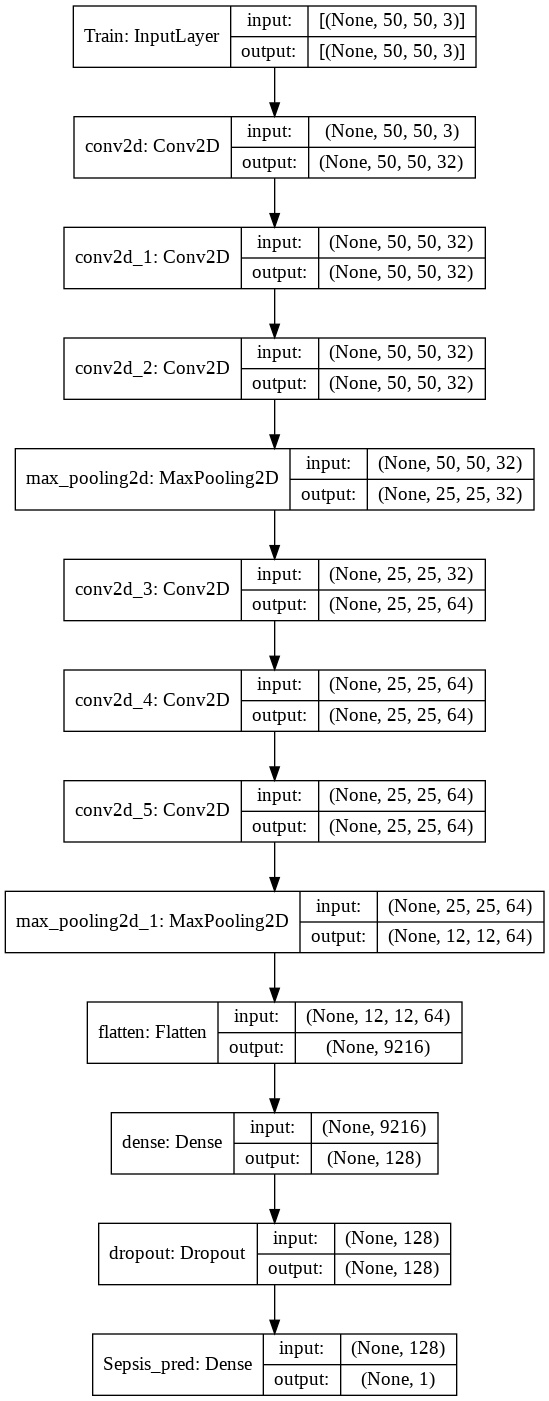

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

##Modelo Melo 3

In [ ]:
train_input = keras.Input(shape=(50,50,3), name='Train')
x1 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(train_input)
x2 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x1)
x3 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x2)
x4 = layers.MaxPool2D(pool_size=(2,2))(x3)

x5 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x4)
x6 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x5)
x7 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x6)
x8 = layers.MaxPool2D(pool_size=(2,2))(x7)

x9 = layers.Conv2D(128,(3,3),padding="same",activation="relu")(x8)
x10 = layers.Conv2D(128,(3,3),padding="same",activation="relu")(x9)
x11 = layers.Conv2D(128,(3,3),padding="same",activation="relu")(x10)

x12 = layers.Flatten()(x11)
x13 = layers.Dense(128, activation='relu')(x12)
x14 = layers.Dropout(0.2)(x13)
pred = layers.Dense(1, activation='sigmoid', name='Sepsis_pred')(x14)
model = keras.Model(inputs=train_input,outputs=pred)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Train (InputLayer)           [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 64)        3692

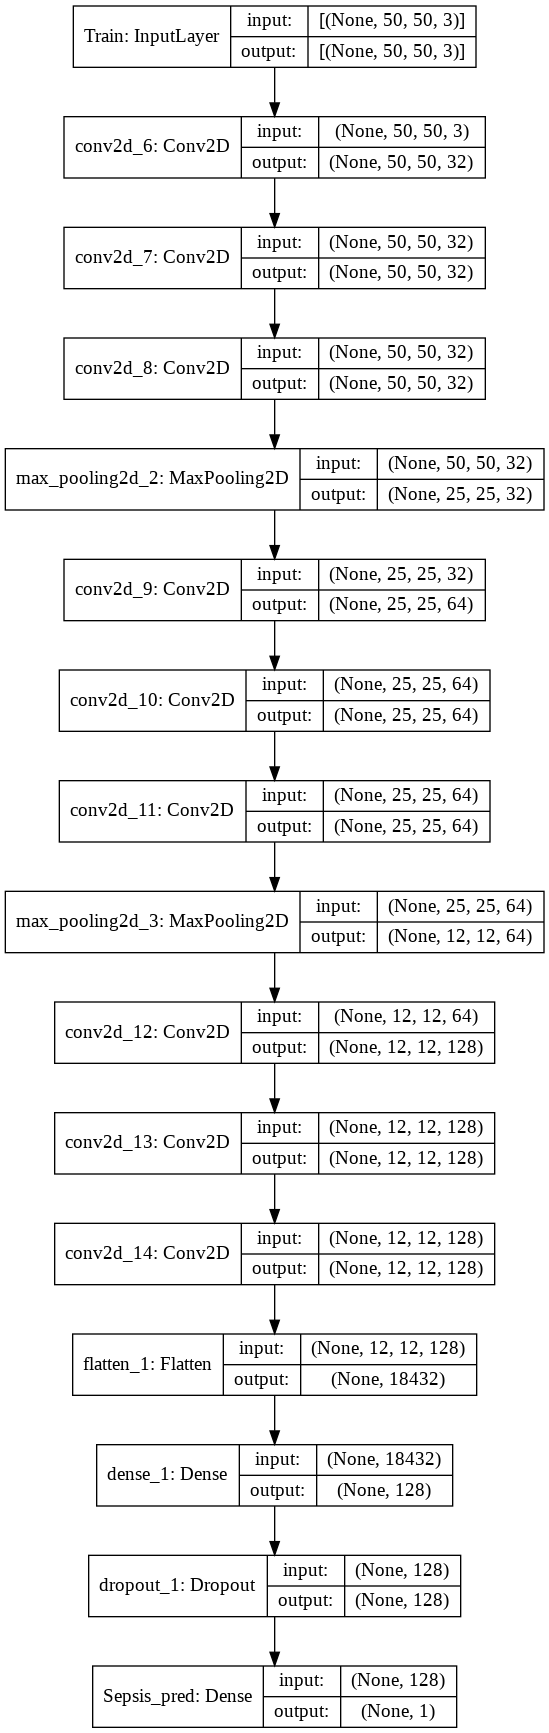

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

##Modelo Melo 2

In [ ]:
train_input = keras.Input(shape=(50,50,3), name='Train')
x1 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(train_input)
x2 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x1)
x3 = layers.Conv2D(32,(3,3),padding="same",activation="relu")(x2)
x4 = layers.MaxPool2D(pool_size=(2,2))(x3)
x5 = layers.Dropout(0.3)(x4)

x6 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x5)
x7 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x6)
x8 = layers.Conv2D(64,(3,3),padding="same",activation="relu")(x7)
x9 = layers.MaxPool2D(pool_size=(2,2))(x8)

x10 = layers.Flatten()(x9)
x11 = layers.Dense(128, activation='relu')(x10)
x12 = layers.Dropout(0.5)(x11)
pred = layers.Dense(1, activation='sigmoid')(x12)
model = keras.Model(inputs=train_input,outputs=pred)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Train (InputLayer)           [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 25, 64)        1849

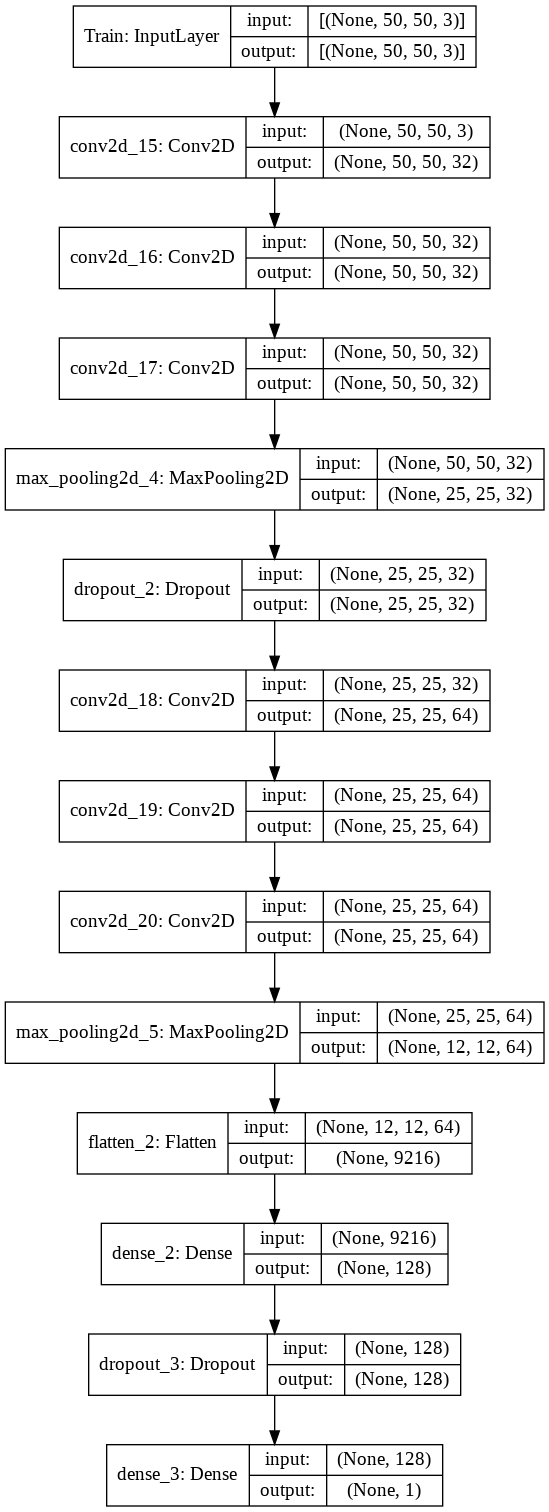

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

##Compilar

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','mse'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train,labels_train, test_size=0.2, random_state=7, stratify=labels_train) #stratify es equitativo

In [ ]:
history=model.fit(X_train,Y_train, epochs = 50,validation_data=(X_val,Y_val))

Epoch 1/50
  87/1226 [=>............................] - ETA: 12:29 - loss: 0.6875 - accuracy: 0.5230 - mse: 0.2463

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_val[index_image])
  predicted_label = "No Cancer" if predictions[index_image]<0.5 else "Cancer"
  real_label="No Cancer" if Y_val[index_image]==0 else "Cancer"
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image]):.4f} ({real_label})', color=color)

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions_label)

In [ ]:
classes = np.unique(Y_val)
classes

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
print(accuracy, misclass)

In [ ]:
cm

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No-Cancer','Cancer']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/ModelosEntrega4/ModeloPino_3.h5')